In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import itertools
from torch.utils.data import DataLoader, TensorDataset
from load_mnist import load_mnist
from utils_1 import train_neural_network, compute_confusion_matrix

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [3]:
# Load MNIST dataset
X_train, Y_train, X_test, Y_test = load_mnist()

# Exercise 1.1  Multi-layer fully-connected neural network

In [4]:
# Hyperparameters
input_size = 784  # 28x28 images
hidden_size_1 = 256
hidden_size_2 = 128
num_classes = 10
num_epochs = 100
batch_size = 128
learning_rate = 0.001

In [5]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long).to(device)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
class NeuralNet(nn.Module):
    def __init__(self, input_size: int, hidden_size_1: int, hidden_size_2: int, num_classes: int):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size_2, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out
    
# Initialize the model
model = NeuralNet(input_size, hidden_size_1, hidden_size_2, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Epoch 1/100, Train Loss: 2.2954, Test Loss: 2.2897, Train Accuracy: 11.00%, Test Accuracy: 12.12%
Epoch 2/100, Train Loss: 2.2825, Test Loss: 2.2758, Train Accuracy: 14.81%, Test Accuracy: 17.59%
Epoch 3/100, Train Loss: 2.2675, Test Loss: 2.2589, Train Accuracy: 22.09%, Test Accuracy: 26.07%
Epoch 4/100, Train Loss: 2.2488, Test Loss: 2.2376, Train Accuracy: 30.44%, Test Accuracy: 33.99%
Epoch 5/100, Train Loss: 2.2248, Test Loss: 2.2099, Train Accuracy: 37.77%, Test Accuracy: 40.89%
Epoch 6/100, Train Loss: 2.1935, Test Loss: 2.1738, Train Accuracy: 44.16%, Test Accuracy: 48.52%
Epoch 7/100, Train Loss: 2.1527, Test Loss: 2.1267, Train Accuracy: 51.92%, Test Accuracy: 55.18%
Epoch 8/100, Train Loss: 2.0997, Test Loss: 2.0658, Train Accuracy: 56.59%, Test Accuracy: 58.70%
Epoch 9/100, Train Loss: 2.0318, Test Loss: 1.9885, Train Accuracy: 59.95%, Test Accuracy: 62.55%
Epoch 10/100, Train Loss: 1.9469, Test Loss: 1.8930, Train Accuracy: 63.42%, Test Accuracy: 65.65%
Epoch 11/100, Train

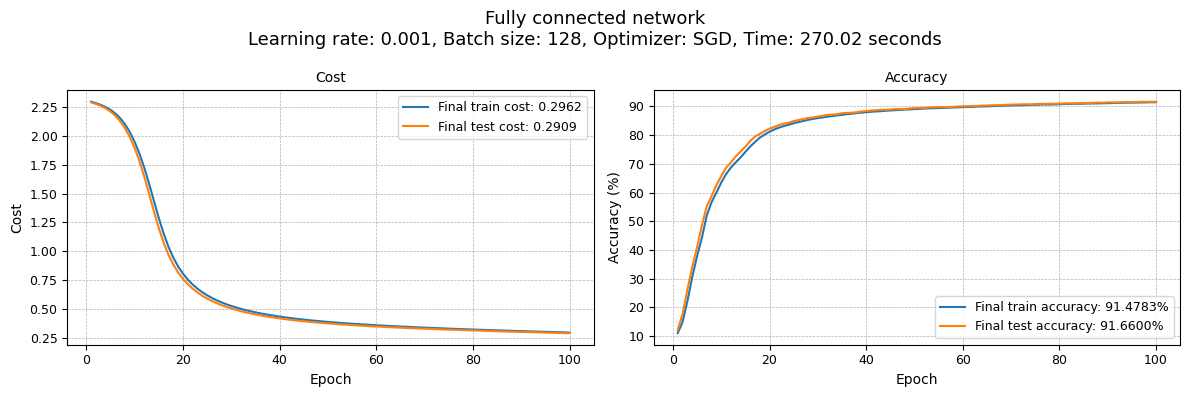

Runtime of train_neural_network: 270.5593 seconds


In [7]:
train_neural_network(model, criterion, optimizer, train_loader, test_loader, num_epochs, device, "Fully connected network")

# Exercise 1.2 Multi-layer convolutional network

In [8]:
# Convert data to PyTorch tensors
X_train_tensor_3D = torch.tensor(X_train, dtype=torch.float32).to(device).view(-1, 1, 28, 28)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long).to(device)
X_test_tensor_3D = torch.tensor(X_test, dtype=torch.float32).to(device).view(-1, 1, 28, 28)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long).to(device)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor_3D, Y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor_3D, Y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Epoch 1/50, Train Loss: 2.0947, Test Loss: 0.8420, Train Accuracy: 44.39%, Test Accuracy: 79.61%
Epoch 2/50, Train Loss: 0.4910, Test Loss: 0.3625, Train Accuracy: 85.18%, Test Accuracy: 89.41%
Epoch 3/50, Train Loss: 0.3101, Test Loss: 0.2557, Train Accuracy: 90.87%, Test Accuracy: 92.72%
Epoch 4/50, Train Loss: 0.2380, Test Loss: 0.2015, Train Accuracy: 92.92%, Test Accuracy: 94.03%
Epoch 5/50, Train Loss: 0.1915, Test Loss: 0.1625, Train Accuracy: 94.26%, Test Accuracy: 95.23%
Epoch 6/50, Train Loss: 0.1589, Test Loss: 0.1389, Train Accuracy: 95.28%, Test Accuracy: 95.64%
Epoch 7/50, Train Loss: 0.1366, Test Loss: 0.1235, Train Accuracy: 95.91%, Test Accuracy: 96.35%
Epoch 8/50, Train Loss: 0.1199, Test Loss: 0.1075, Train Accuracy: 96.38%, Test Accuracy: 96.87%
Epoch 9/50, Train Loss: 0.1079, Test Loss: 0.0899, Train Accuracy: 96.75%, Test Accuracy: 97.19%
Epoch 10/50, Train Loss: 0.0986, Test Loss: 0.0827, Train Accuracy: 97.02%, Test Accuracy: 97.36%
Epoch 11/50, Train Loss: 0.09

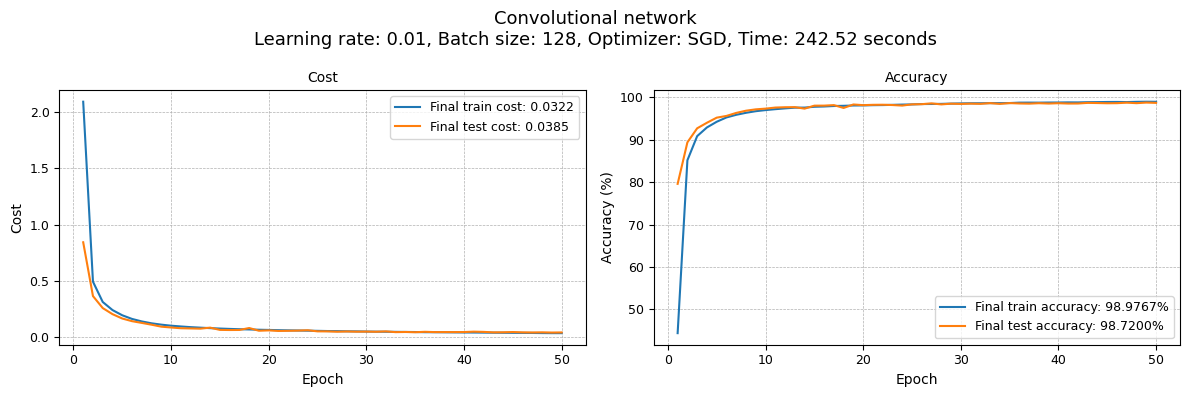

Runtime of train_neural_network: 242.8840 seconds


In [9]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        
        self.fc = nn.Linear(32*7*7, 10)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.pool1(out)
        
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.pool2(out)
        
        out = self.conv3(out)
        out = self.relu3(out)
        
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


# Hyperparameters
num_epochs = 50
learning_rate = 0.01

conv_model = ConvNet().to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(conv_model.parameters(), lr=learning_rate)
train_neural_network(conv_model, criterion, optimizer, train_loader, test_loader, num_epochs, device, "Convolutional network")


# Exercise 1.3 Swap the order of max-pool and activation function

## a\) Swap order of max-pool and ReLU

Epoch 1/50, Train Loss: 1.5051, Test Loss: 0.4622, Train Accuracy: 59.02%, Test Accuracy: 86.17%
Epoch 2/50, Train Loss: 0.3880, Test Loss: 0.3197, Train Accuracy: 88.14%, Test Accuracy: 90.22%
Epoch 3/50, Train Loss: 0.2960, Test Loss: 0.2625, Train Accuracy: 90.97%, Test Accuracy: 92.37%
Epoch 4/50, Train Loss: 0.2415, Test Loss: 0.2035, Train Accuracy: 92.73%, Test Accuracy: 93.80%
Epoch 5/50, Train Loss: 0.2006, Test Loss: 0.1736, Train Accuracy: 94.05%, Test Accuracy: 94.86%
Epoch 6/50, Train Loss: 0.1692, Test Loss: 0.1450, Train Accuracy: 94.98%, Test Accuracy: 95.46%
Epoch 7/50, Train Loss: 0.1466, Test Loss: 0.1411, Train Accuracy: 95.67%, Test Accuracy: 95.89%
Epoch 8/50, Train Loss: 0.1288, Test Loss: 0.1181, Train Accuracy: 96.09%, Test Accuracy: 96.35%
Epoch 9/50, Train Loss: 0.1154, Test Loss: 0.1022, Train Accuracy: 96.48%, Test Accuracy: 96.85%
Epoch 10/50, Train Loss: 0.1054, Test Loss: 0.0952, Train Accuracy: 96.84%, Test Accuracy: 97.20%
Epoch 11/50, Train Loss: 0.09

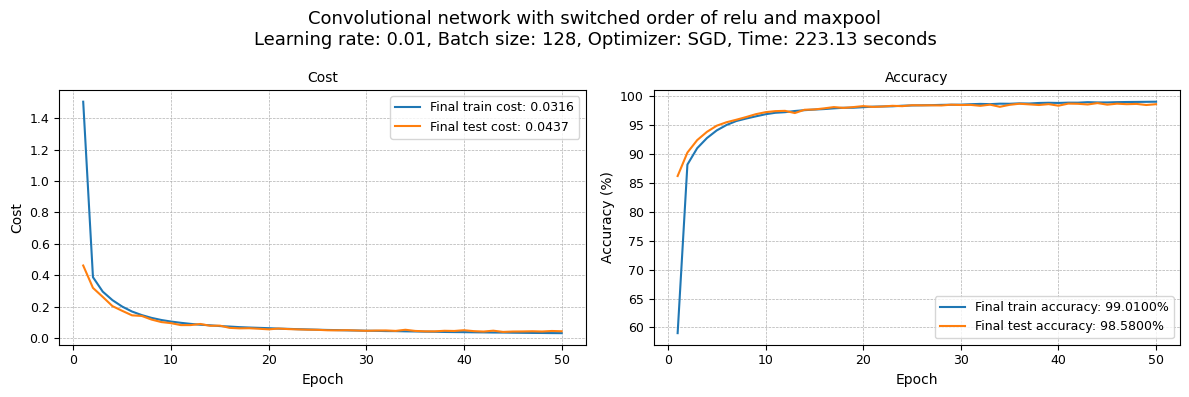

Runtime of train_neural_network: 223.4955 seconds


In [10]:
class ConvNetSwitch(nn.Module):
    def __init__(self):
        super(ConvNetSwitch, self).__init__()
        # Switch order of relu and maxpool
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu1 = nn.ReLU()
        
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu2 = nn.ReLU()
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        
        self.fc = nn.Linear(32*7*7, 10)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.pool1(out)
        out = self.relu1(out)
        
        out = self.conv2(out)
        out = self.pool2(out)
        out = self.relu2(out)
        
        out = self.conv3(out)
        out = self.relu3(out)
        
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

    
conv_switch_model = ConvNetSwitch().to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(conv_switch_model.parameters(), lr=learning_rate)
train_neural_network(conv_switch_model, criterion, optimizer, train_loader, test_loader, num_epochs, device, "Convolutional network with switched order of relu and maxpool")

## b\) Use tanh activation instead of ReLU

Epoch 1/50, Train Loss: 1.7636, Test Loss: 0.7895, Train Accuracy: 54.89%, Test Accuracy: 79.88%
Epoch 2/50, Train Loss: 0.5761, Test Loss: 0.4500, Train Accuracy: 83.86%, Test Accuracy: 87.35%
Epoch 3/50, Train Loss: 0.4177, Test Loss: 0.3722, Train Accuracy: 87.70%, Test Accuracy: 89.06%
Epoch 4/50, Train Loss: 0.3602, Test Loss: 0.3300, Train Accuracy: 89.31%, Test Accuracy: 90.32%
Epoch 5/50, Train Loss: 0.3244, Test Loss: 0.3001, Train Accuracy: 90.30%, Test Accuracy: 90.91%
Epoch 6/50, Train Loss: 0.2964, Test Loss: 0.2735, Train Accuracy: 91.17%, Test Accuracy: 91.82%
Epoch 7/50, Train Loss: 0.2728, Test Loss: 0.2518, Train Accuracy: 91.92%, Test Accuracy: 92.64%
Epoch 8/50, Train Loss: 0.2512, Test Loss: 0.2331, Train Accuracy: 92.61%, Test Accuracy: 93.25%
Epoch 9/50, Train Loss: 0.2315, Test Loss: 0.2120, Train Accuracy: 93.15%, Test Accuracy: 93.89%
Epoch 10/50, Train Loss: 0.2133, Test Loss: 0.1938, Train Accuracy: 93.76%, Test Accuracy: 94.24%
Epoch 11/50, Train Loss: 0.19

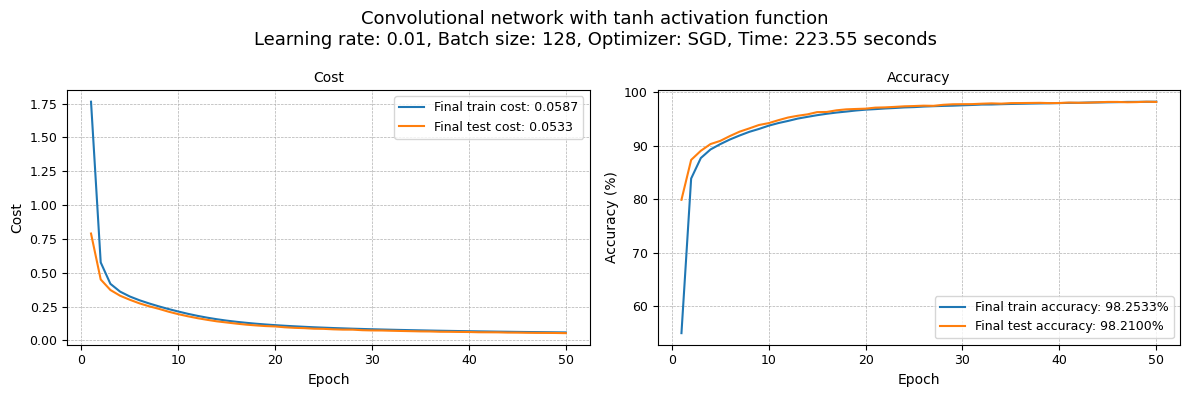

Runtime of train_neural_network: 223.8503 seconds


In [11]:
class ConvNetTanh(nn.Module):
    def __init__(self):
        super(ConvNetTanh, self).__init__()
        # Switch order of relu and maxpool
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.tanh1 = nn.Tanh()
        
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.tanh2 = nn.Tanh()
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.tanh3 = nn.Tanh()
        
        self.fc = nn.Linear(32*7*7, 10)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.pool1(out)
        out = self.tanh1(out)
        
        out = self.conv2(out)
        out = self.pool2(out)
        out = self.tanh2(out)
        
        out = self.conv3(out)
        out = self.tanh3(out)
        
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

    
conv_switch_tanh_model = ConvNetTanh().to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(conv_switch_tanh_model.parameters(), lr=learning_rate)
train_neural_network(conv_switch_tanh_model, criterion, optimizer, train_loader, test_loader, num_epochs, device, "Convolutional network with tanh activation function")


# Exercise 1.4 Use the ADAM Optimizer

Epoch 1/50, Train Loss: 0.1652, Test Loss: 0.0412, Train Accuracy: 94.73%, Test Accuracy: 98.68%
Epoch 2/50, Train Loss: 0.0532, Test Loss: 0.0442, Train Accuracy: 98.37%, Test Accuracy: 98.55%
Epoch 3/50, Train Loss: 0.0413, Test Loss: 0.0449, Train Accuracy: 98.72%, Test Accuracy: 98.53%
Epoch 4/50, Train Loss: 0.0374, Test Loss: 0.0365, Train Accuracy: 98.81%, Test Accuracy: 98.88%
Epoch 5/50, Train Loss: 0.0355, Test Loss: 0.0542, Train Accuracy: 98.90%, Test Accuracy: 98.37%
Epoch 6/50, Train Loss: 0.0316, Test Loss: 0.0429, Train Accuracy: 98.98%, Test Accuracy: 98.77%
Epoch 7/50, Train Loss: 0.0300, Test Loss: 0.0496, Train Accuracy: 99.08%, Test Accuracy: 98.54%
Epoch 8/50, Train Loss: 0.0348, Test Loss: 0.0559, Train Accuracy: 98.93%, Test Accuracy: 98.58%
Epoch 9/50, Train Loss: 0.0329, Test Loss: 0.0618, Train Accuracy: 98.99%, Test Accuracy: 98.31%
Epoch 10/50, Train Loss: 0.0364, Test Loss: 0.0495, Train Accuracy: 98.97%, Test Accuracy: 98.78%
Epoch 11/50, Train Loss: 0.03

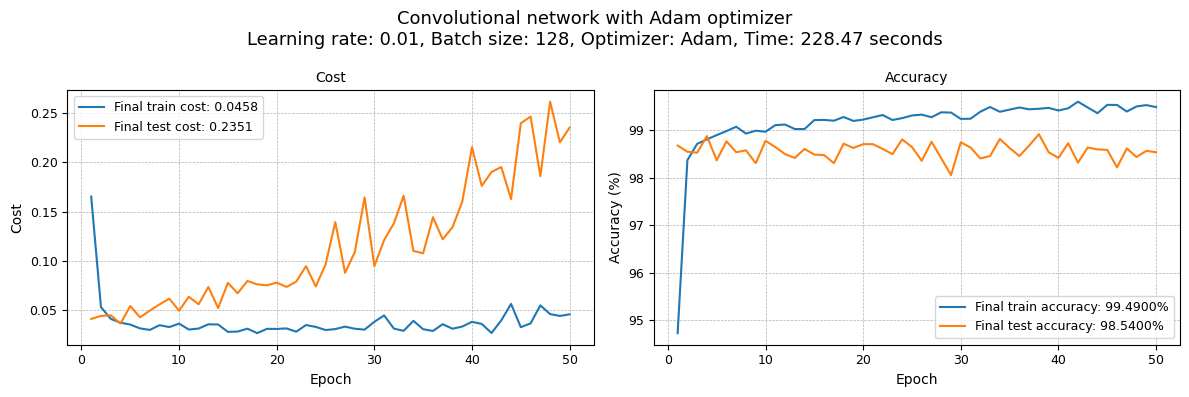

Runtime of train_neural_network: 228.8442 seconds


In [12]:
conv_model = ConvNet().to(device)
optimizer = torch.optim.Adam(conv_model.parameters(), lr=learning_rate)
train_neural_network(conv_model, criterion, optimizer, train_loader, test_loader, num_epochs, device, "Convolutional network with Adam optimizer")


# Exercise 1.5 Three variations of Convolutional Network

In [13]:
# Hyperparameters
num_epochs = 50
learning_rate = 0.01
batch_size = 100

# Convert data to PyTorch tensors
X_train_tensor_3D = torch.tensor(X_train, dtype=torch.float32).to(device).view(-1, 1, 28, 28)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long).to(device)
X_test_tensor_3D = torch.tensor(X_test, dtype=torch.float32).to(device).view(-1, 1, 28, 28)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long).to(device)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor_3D, Y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor_3D, Y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

## Model A - with momentum

Epoch 1/50, Train Loss: 0.3808, Test Loss: 0.1041, Train Accuracy: 88.44%, Test Accuracy: 96.68%
Epoch 2/50, Train Loss: 0.0901, Test Loss: 0.0560, Train Accuracy: 97.26%, Test Accuracy: 98.15%
Epoch 3/50, Train Loss: 0.0639, Test Loss: 0.0494, Train Accuracy: 98.01%, Test Accuracy: 98.22%
Epoch 4/50, Train Loss: 0.0531, Test Loss: 0.0463, Train Accuracy: 98.31%, Test Accuracy: 98.38%
Epoch 5/50, Train Loss: 0.0448, Test Loss: 0.0446, Train Accuracy: 98.62%, Test Accuracy: 98.57%
Epoch 6/50, Train Loss: 0.0384, Test Loss: 0.0372, Train Accuracy: 98.76%, Test Accuracy: 98.75%
Epoch 7/50, Train Loss: 0.0345, Test Loss: 0.0398, Train Accuracy: 98.91%, Test Accuracy: 98.66%
Epoch 8/50, Train Loss: 0.0308, Test Loss: 0.0383, Train Accuracy: 98.99%, Test Accuracy: 98.66%
Epoch 9/50, Train Loss: 0.0280, Test Loss: 0.0330, Train Accuracy: 99.11%, Test Accuracy: 98.87%
Epoch 10/50, Train Loss: 0.0252, Test Loss: 0.0315, Train Accuracy: 99.22%, Test Accuracy: 98.88%
Epoch 11/50, Train Loss: 0.02

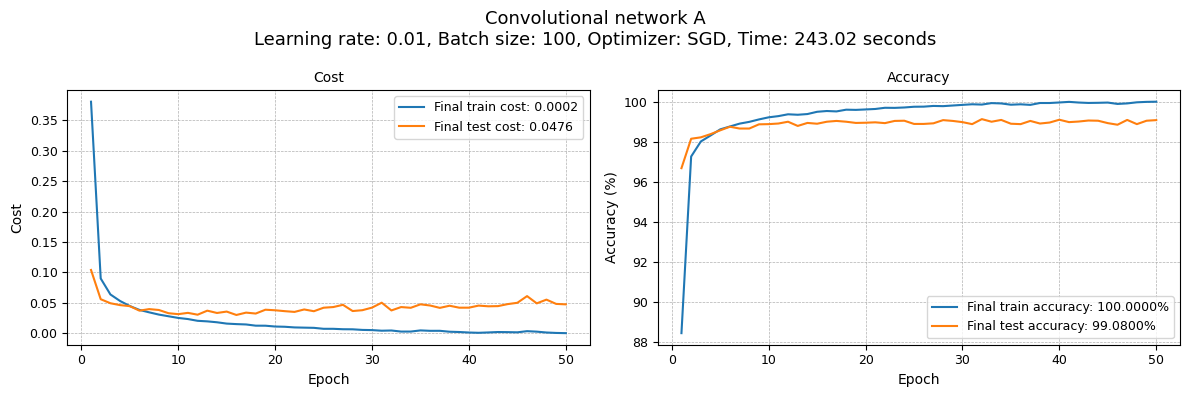

Runtime of train_neural_network: 243.3899 seconds


In [14]:
class ConvNetA(nn.Module):
    def __init__(self):
        super(ConvNetA, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        
        self.fc = nn.Linear(32*7*7, 10)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.pool1(out)
        
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.pool2(out)
        
        out = self.conv3(out)
        out = self.relu3(out)
        
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

# Hyperparameters
num_epochs = 50
learning_rate = 0.01

conv_model_A = ConvNetA().to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(conv_model_A.parameters(), lr=learning_rate, momentum=0.9)
train_neural_network(conv_model_A, criterion, optimizer, train_loader, test_loader, num_epochs, device, "Convolutional network A")

## Model B - with weight decay

Epoch 1/50, Train Loss: 2.3024, Test Loss: 2.3023, Train Accuracy: 11.24%, Test Accuracy: 11.35%
Epoch 2/50, Train Loss: 2.3023, Test Loss: 2.3024, Train Accuracy: 11.24%, Test Accuracy: 11.35%
Epoch 3/50, Train Loss: 2.3024, Test Loss: 2.3023, Train Accuracy: 11.24%, Test Accuracy: 11.35%
Epoch 4/50, Train Loss: 2.3024, Test Loss: 2.3023, Train Accuracy: 11.24%, Test Accuracy: 11.35%
Epoch 5/50, Train Loss: 2.3023, Test Loss: 2.3024, Train Accuracy: 11.24%, Test Accuracy: 11.35%
Epoch 6/50, Train Loss: 2.3024, Test Loss: 2.3024, Train Accuracy: 11.24%, Test Accuracy: 11.35%
Epoch 7/50, Train Loss: 2.3024, Test Loss: 2.3023, Train Accuracy: 11.22%, Test Accuracy: 11.35%
Epoch 8/50, Train Loss: 2.3023, Test Loss: 2.3023, Train Accuracy: 11.24%, Test Accuracy: 11.35%
Epoch 9/50, Train Loss: 2.3024, Test Loss: 2.3023, Train Accuracy: 11.19%, Test Accuracy: 11.35%
Epoch 10/50, Train Loss: 2.3023, Test Loss: 2.3023, Train Accuracy: 11.24%, Test Accuracy: 11.35%
Epoch 11/50, Train Loss: 2.30

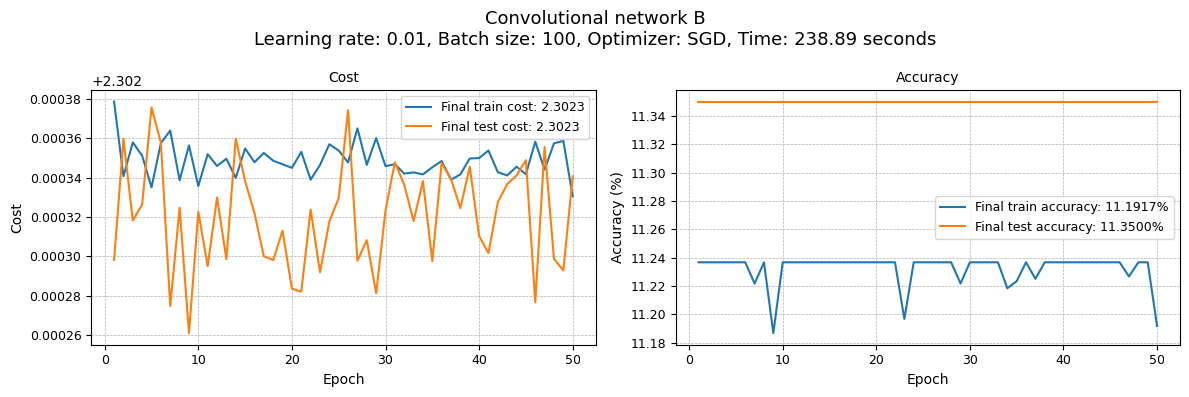

Runtime of train_neural_network: 239.3437 seconds


In [15]:
class ConvNetB(nn.Module):
    def __init__(self):
        super(ConvNetB, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        
        self.fc = nn.Linear(32*7*7, 10)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.pool1(out)
        
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.pool2(out)
        
        out = self.conv3(out)
        out = self.relu3(out)
        
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

# Hyperparameters
num_epochs = 50
learning_rate = 0.01

conv_model_B = ConvNetB().to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(conv_model_B.parameters(), lr=learning_rate, weight_decay=1)
train_neural_network(conv_model_B, criterion, optimizer, train_loader, test_loader, num_epochs, device, "Convolutional network B")

## Model C - with weight decay and momentum

Epoch 1/50, Train Loss: 0.4754, Test Loss: 0.0939, Train Accuracy: 85.21%, Test Accuracy: 97.25%
Epoch 2/50, Train Loss: 0.0908, Test Loss: 0.0762, Train Accuracy: 97.25%, Test Accuracy: 97.52%
Epoch 3/50, Train Loss: 0.0666, Test Loss: 0.0593, Train Accuracy: 97.99%, Test Accuracy: 97.92%
Epoch 4/50, Train Loss: 0.0555, Test Loss: 0.0482, Train Accuracy: 98.29%, Test Accuracy: 98.47%
Epoch 5/50, Train Loss: 0.0482, Test Loss: 0.0423, Train Accuracy: 98.51%, Test Accuracy: 98.57%
Epoch 6/50, Train Loss: 0.0451, Test Loss: 0.0384, Train Accuracy: 98.61%, Test Accuracy: 98.85%
Epoch 7/50, Train Loss: 0.0414, Test Loss: 0.0395, Train Accuracy: 98.74%, Test Accuracy: 98.76%
Epoch 8/50, Train Loss: 0.0391, Test Loss: 0.0450, Train Accuracy: 98.81%, Test Accuracy: 98.53%
Epoch 9/50, Train Loss: 0.0368, Test Loss: 0.0337, Train Accuracy: 98.90%, Test Accuracy: 98.95%
Epoch 10/50, Train Loss: 0.0334, Test Loss: 0.0378, Train Accuracy: 98.95%, Test Accuracy: 98.66%
Epoch 11/50, Train Loss: 0.03

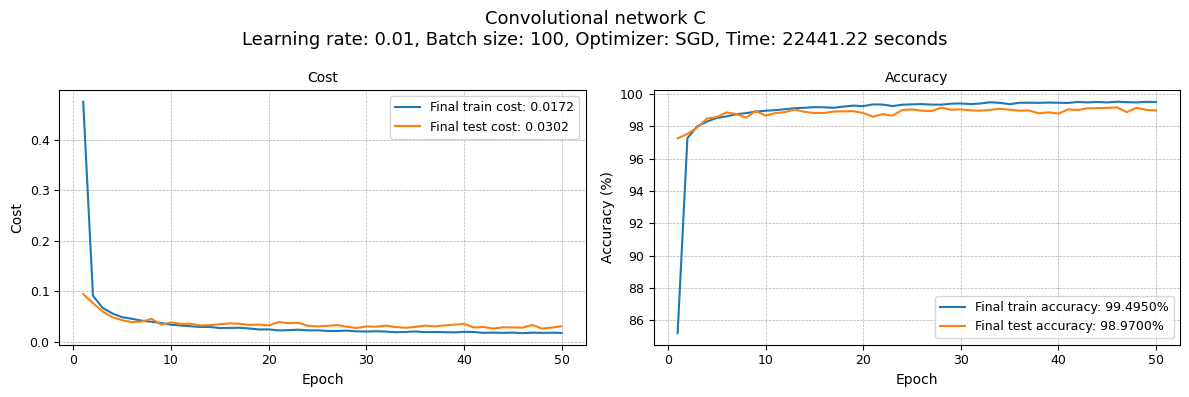

Runtime of train_neural_network: 22441.6230 seconds


In [16]:
class ConvNetC(nn.Module):
    def __init__(self):
        super(ConvNetC, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        
        self.fc = nn.Linear(32*7*7, 10)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.pool1(out)
        
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.pool2(out)
        
        out = self.conv3(out)
        out = self.relu3(out)
        
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

conv_model_C = ConvNetC().to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(conv_model_C.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.001)
train_neural_network(conv_model_C, criterion, optimizer, train_loader, test_loader, num_epochs, device, "Convolutional network C")

## Confusion matrix

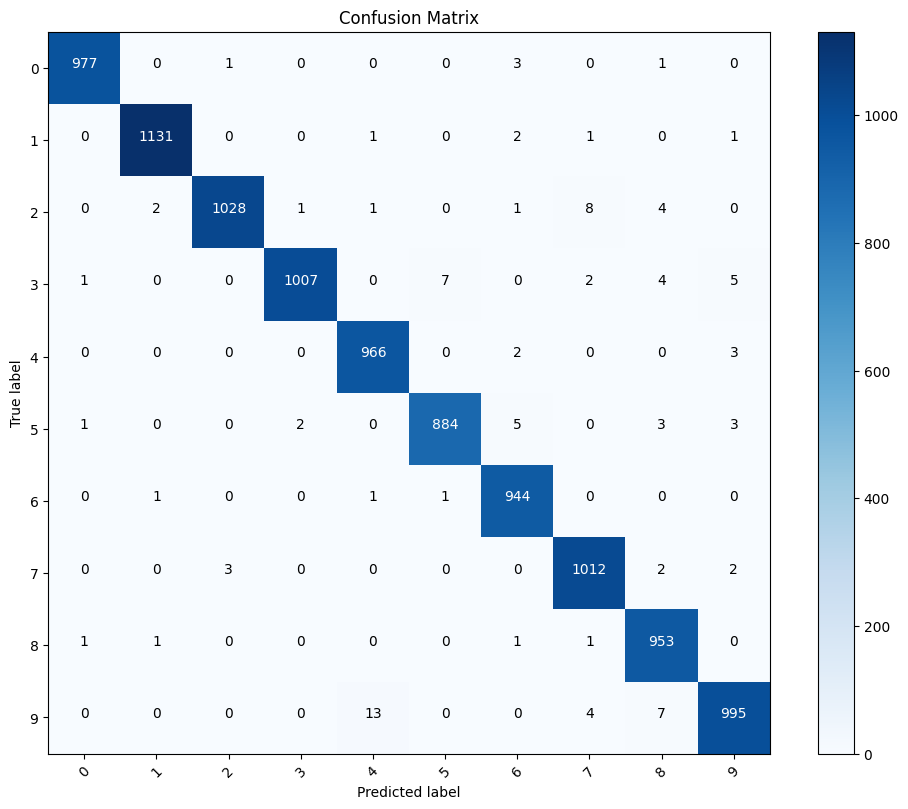

In [17]:
# Define class labels
class_labels = np.arange(10)

# Compute confusion matrix
confusion_matrix = torch.zeros(10, 10).to(device)
with torch.no_grad():
    for (x_test, y_test) in test_loader:
        x_test, y_test = x_test.to(device), y_test.to(device)
        predictions = conv_model_C(x_test) # Forward pass on test dataset
        confusion_matrix += compute_confusion_matrix(predictions, y_test)
        
confusion_matrix_np = confusion_matrix.cpu().numpy()

# Create confusion matrix plot
plt.figure(figsize=(10, 8))
plt.imshow(confusion_matrix_np, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Add labels to each cell
thresh = confusion_matrix_np.max() / 2.
for i, j in itertools.product(range(confusion_matrix_np.shape[0]), range(confusion_matrix_np.shape[1])):
    plt.text(j, i, format(confusion_matrix_np[i, j], '.0f'),
            horizontalalignment="center",
            color="white" if confusion_matrix_np[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# Misclassifications

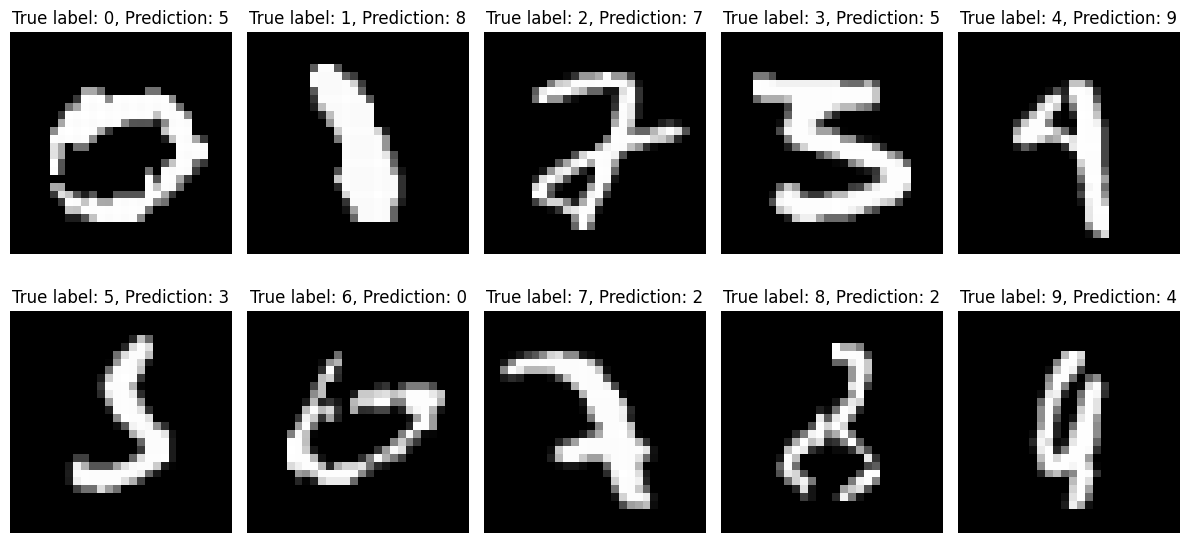

In [18]:
conv_model_C.eval()
with torch.no_grad():
    # Forward pass to get the predictions
    outputs = conv_model_C(X_test_tensor_3D)
    _, predicted = torch.max(outputs.data, 1)
labels = np.argmax(Y_test, axis=1)
predicted = predicted.to('cpu').numpy() 
wrong_indices = np.where(predicted != labels)[0]

selected_wrong_indices = {i: None for i in range(10)}

for index in wrong_indices:
    if selected_wrong_indices[labels[index]] is None:
        selected_wrong_indices[labels[index]] = (X_test_tensor_3D[index].cpu().squeeze(), predicted[index], labels[index])
    
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i, (image, prediction, label) in selected_wrong_indices.items():
    axs[i//5, i%5].imshow(image, cmap='gray')
    axs[i//5, i%5].set_title(f'True label: {label}, Prediction: {prediction}')
    axs[i//5, i%5].axis('off')
plt.tight_layout()